1. Import jeopardy.csv and create a dataframe from the data. Find out the following:
a. How many rows are there in the dataframe? What does a row represent in this
dataset? What is the “grain”?
b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
c. How many unique shows were there each year?
d. How many times was each category used?
e. Which month (over the years) has had the most shows?
f. Are there any answers that appeared multiple times? Find the questions for the top
three most common answers.

2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.

In [2]:
import pandas as pd
import numpy as np


jeopardy = pd.read_csv("JEOPARDY_CSV.csv")
jeopardy

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [ ]:
#1a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?

In [3]:
print(len(jeopardy))

216930


1a. There are 216930 rows in this dataframe.  Each row represents a single clue given during a specific round ("regular"/Double/Final) in an episode of Jeopardy.  This is also known as the "grain" in that it establishes exactly what a single row represents.

In [4]:
#1b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

jeopardy = jeopardy.drop_duplicates()

jeopardy['month'] = pd.DatetimeIndex(jeopardy[' Air Date']).month
jeopardy

,Show Number,Air Date,Round,Category,Value,Question,Answer,year,month
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004,12
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004,12
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004,12
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004,12
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004,12
...,...,...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot,2006,5
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse,2006,5
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,2006,5
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,2006,5


1b.  This data is honestly pretty clean - there are "duplicate" categories and rounds common to some entries, but each entry represents a unique question asked on the show.  There are diffent ways the data can be grouped (by episode, date, category, etc.), but our in-class group and Maggie didn't see any major ways in which this data is "dirty."  (There is a space at the beginning of each column name.)

In [3]:
#1c. How many unique shows were there each year?

jeopardy['year'] = pd.DatetimeIndex(jeopardy[' Air Date']).year


jeopardy_year = jeopardy.groupby("year")


In [6]:
jeopardy_year.describe()

#this gives the number of unique entries (clues) per year, but each show contains many clues - 
#we need to do more to answer this question.

Show Number                                                          \
           count         mean        std     min     25%     50%     75%   
year                                                                       
1984      1179.0    35.776081  27.544175     1.0     9.0    56.0    63.0   
1985       888.0   289.010135  47.089937   110.0   279.0   308.0   312.0   
1986      1409.0   457.763662  58.202443   351.0   422.0   484.0   501.0   
1987      1275.0   686.388235  61.601194   571.0   619.0   732.0   737.0   
1988      1290.0   899.903876  81.475627   776.0   786.0   961.0   966.0   
1989      2067.0  1174.519594  46.017832  1002.0  1158.0  1191.0  1200.0   
1990      4337.0  1308.462071  56.565852  1236.0  1265.0  1296.0  1328.0   
1991      1444.0  1599.073407  69.798424  1474.0  1531.0  1639.0  1656.0   
1992      1885.0  1853.788329  45.582643  1740.0  1799.0  1874.0  1887.0   
1993      2132.0  2071.445122  59.554898  1932.0  2038.0  2055.0  2124.0   
1994      1136.0  2332.040493  45.209138  2207.0  2340.0  2349.0  2354.0   
1995      1138.0  2562.183656  28.197516  2512.0  2541.0  2577.0  2582.0   
1996      4891.0  2751.777551  77.503448  2619.0  2677.0  2777.0  2821.0   
1997     13099.0  2960.329643  65.999922  2843.0  2905.0  2962.0  3017.0   
1998     13143.0  3186.434908  64.852602  3075.0  3130.0  3187.0  3243.0   
1999     13540.0  3414.992984  66.491592  3301.0  3357.0  3416.0  3472.0   
2000     13439.0  3646.803780  66.451017  3531.0  3588.0  3648.0  3704.0   
2001     12097.0  3865.337274  62.481917  3761.0  3812.0  3862.0  3917.0   
2002      6859.0  4156.225106  46.412127  4031.0  4136.0  4164.0  4193.0   
2003      9426.0  4305.720985  50.207115  4223.0  4262.0  4305.0  4344.0   
2004     13190.0  4569.342835  65.408258  4451.0  4515.0  4571.0  4625.0   
2005     13560.0  4792.598230  64.860376  4681.0  4736.0  4792.0  4849.0   
2006     13726.0  5019.700860  66.159404  4906.0  4963.0  5019.0  5076.0   
2007     13940.0  5250.862052  66.666025  5136.0  5193.0  5251.0  5309.0   
2008     14036.0  5482.533913  66.995089  5367.0  5424.0  5483.0  5541.0   
2009     13579.0  5711.176007  65.187463  5599.0  5655.0  5711.0  5767.0   
2010     13756.0  5940.020718  66.698157  5825.0  5882.0  5940.0  5998.0   
2011     13376.0  6168.706265  64.646589  6056.0  6113.0  6169.0  6225.0   
2012      1093.0  6289.795059   5.435275  6281.0  6285.0  6290.0  6294.0   

              
         max  
year          
1984    68.0  
1985   315.0  
1986   533.0  
1987   759.0  
1988   980.0  
1989  1230.0  
1990  1430.0  
1991  1685.0  
1992  1908.0  
1993  2150.0  
1994  2378.0  
1995  2595.0  
1996  2842.0  
1997  3073.0  
1998  3299.0  
1999  3530.0  
2000  3760.0  
2001  3984.0  
2002  4222.0  
2003  4417.0  
2004  4680.0  
2005  4905.0  
2006  5135.0  
2007  5366.0  
2008  5598.0  
2009  5824.0  
2010  6055.0  
2011  6280.0  
2012  6300.0

In [11]:
unique_shows=jeopardy_year['Show Number'].nunique()
unique_shows

#table below shows number of unique shows per year

year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64

In [24]:
#1d. How many times was each category used?
jeopardy_cat=jeopardy.groupby(' Category').count()
jeopardy_cat

,Show Number,Air Date,Round,Value,Question,Answer,year,month
Category,,,,,,,,
A JIM CARREY FILM FESTIVAL,5,5,5,5,5,5,5,5
"""!""",5,5,5,5,5,5,5,5
"""-ARES""",5,5,5,5,5,5,5,5
"""-ICIAN"" EXPEDITION",5,5,5,5,5,5,5,5
"""...OD"" WORDS",5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
“R” MOVIES,5,5,5,5,5,5,5,5
“SAINTS”,4,4,4,4,4,4,4,4
“SOUTH”,5,5,5,5,5,5,5,5


1d. The above table should show the # of times each category was used, but its total number of rows is greater than that of the original dataset so I am confused!

In [33]:
#1e. Which month (over the years) has had the most shows?

jeopardy['month'] = pd.DatetimeIndex(jeopardy[' Air Date']).month


jeopardy_month = jeopardy.groupby("month")
jeopardy_month.describe()

Show Number                                                            \
            count         mean          std     min     25%     50%     75%   
month                                                                         
1         21128.0  4325.984286  1358.722274   351.0  3313.0  4466.0  5383.0   
2         17501.0  4255.558254  1347.837511   110.0  3333.0  4475.0  5396.0   
3         19731.0  4382.229183  1204.684229  1274.0  3362.0  4507.0  5417.0   
4         19654.0  4277.732726  1343.990477   422.0  3372.0  4521.0  5436.0   
5         21052.0  4262.690101  1338.500192   446.0  3396.0  4536.0  5244.0   
6         19331.0  4493.599245  1131.354623   662.0  3642.0  4571.0  5482.0   
7         15423.0  4614.479933  1148.146139   902.0  3666.0  4818.0  5512.0   
9         16053.0  4108.912727  1409.352730     1.0  3233.0  4146.0  5287.0   
10        20510.0  4404.763189  1271.281001   277.0  3482.0  4617.0  5534.0   
11        25672.0  3694.654137  1745.382977    56.0  2351.0  3732.0  5324.0   
12        20875.0  4297.041677  1444.231351    61.0  3290.0  4661.0  5579.0   

                  year                                                         \
          max    count         mean       std     min     25%     50%     75%   
month                                                                           
1      6300.0  21128.0  2003.417929  5.921089  1986.0  1999.0  2004.0  2008.0   
2      6096.0  17501.0  2003.017828  5.874499  1985.0  1999.0  2004.0  2008.0   
3      6119.0  19731.0  2003.477675  5.249087  1990.0  1999.0  2004.0  2008.0   
4      6140.0  19654.0  2002.928920  5.852222  1986.0  1999.0  2004.0  2008.0   
5      6162.0  21052.0  2002.768526  5.830532  1986.0  1999.0  2004.0  2007.0   
6      6184.0  19331.0  2003.678289  4.929625  1987.0  2000.0  2004.0  2008.0   
7      6205.0  15423.0  2004.121118  4.995483  1988.0  2000.0  2005.0  2008.0   
9      6215.0  16053.0  2001.845886  6.134268  1984.0  1998.0  2002.0  2007.0   
10     6236.0  20510.0  2003.047343  5.540700  1985.0  1999.0  2004.0  2008.0   
11     6258.0  25672.0  1999.861016  7.602985  1984.0  1994.0  2000.0  2007.0   
12     6280.0  20875.0  2002.390898  6.288329  1984.0  1998.0  2004.0  2008.0   

               
          max  
month          
1      2012.0  
2      2011.0  
3      2011.0  
4      2011.0  
5      2011.0  
6      2011.0  
7      2011.0  
9      2011.0  
10     2011.0  
11     2011.0  
12     2011.0

1e. November (month 11) had the most questions over the years with 25672.

In [20]:
#1f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.
jeopardy_ans = jeopardy.groupby(" Answer").count()
jeopardy_ans

,Show Number,Air Date,Round,Category,Value,Question,year,month
Answer,,,,,,,,
Hamlet,1,1,1,1,1,1,1,1
Les Miserables,1,1,1,1,1,1,1,1
Nosferatu,1,1,1,1,1,1,1,1
She Loves You,1,1,1,1,1,1,1,1
Sleepless in Seattle,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
étoufée,2,2,2,2,2,2,2,2
études,1,1,1,1,1,1,1,1
été,1,1,1,1,1,1,1,1


In [37]:
jeopardy[' Answer'].value_counts()

China              216
Australia          215
Japan              196
Chicago            194
France             193
                  ... 
Russian Blue         1
Randy Gerber         1
feudalism            1
"Say, Say, Say"      1
braising             1
Name:  Answer, Length: 88236, dtype: int64

In [38]:
top_answers = ["China", "Australia", "Japan"]
print(top_answers)

['China', 'Australia', 'Japan']


China, Australia, and Japan were the three most frequent answers.

In [42]:
#2. Create a visualization that shows the top 5 categories (those referenced the most often). 
#Be sure to label appropriately.

jeopardy[' Category'].value_counts()

BEFORE & AFTER               547
SCIENCE                      519
LITERATURE                   496
AMERICAN HISTORY             418
POTPOURRI                    401
                            ... 
ALLIANCES                      1
RELIGIOUS PERSONALITIES        1
FILM TITLES                    1
STATE GEMS                     1
...SEE WHAT'S ON THE SLAB      1
Name:  Category, Length: 27983, dtype: int64

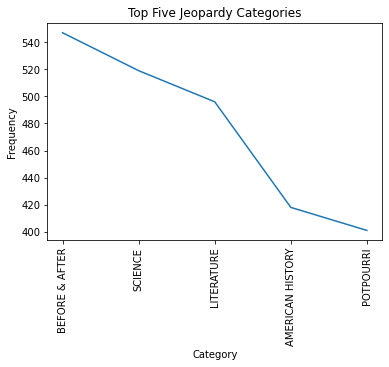

In [55]:
import matplotlib.pyplot as plt 
import seaborn as sns

top_5_cat = ["BEFORE & AFTER", "SCIENCE", "LITERATURE", "AMERICAN HISTORY", "POTPOURRI"]
top_5_num = [547, 519, 496, 418, 401]
g = sns.lineplot(x=top_5_cat, y=top_5_num)
g.set_title("Top Five Jeopardy Categories")
g.set(xlabel="Category", ylabel="Frequency")
plt.xticks(rotation=90)
plt.show()

(I know there are more aesthetically pleasing ways to do show the data, but right now I'm trying to get caught up and perfect is the enemy of done!)